# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ml_butterfly\AppData\Local\Temp\pip-install-d1pthz3m\tensorflow-gpu_e9b1851785624a5389763ae174a23685\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could n

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.1
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = "C:/Users/ml_butterfly/OneDrive/Documents/GitHub/butterflyml/LepidopteraAI/static/dataset/Pupa_defects"

In [ ]:
CATEGORIES = ["Ant bites","Deformed body","Healthy Pupae","Old Pupa","Overbend","Stretched abdomen"]

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

FileNotFoundError: ignored

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory("C:/jerwin/PCMS/classification/static/dataset/Pupa_defects")#https://drive.google.com/drive/u/0/folders/12ME1WUdLMAhaBijrWf8IhfuG_RfRPFMA
print (CATEGORIES[0:5])

Found 137 files belonging to 6 classes.
['Ant bites', 'Deformed body', 'Healthy Pupae', 'Old Pupa', 'Overbend']


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

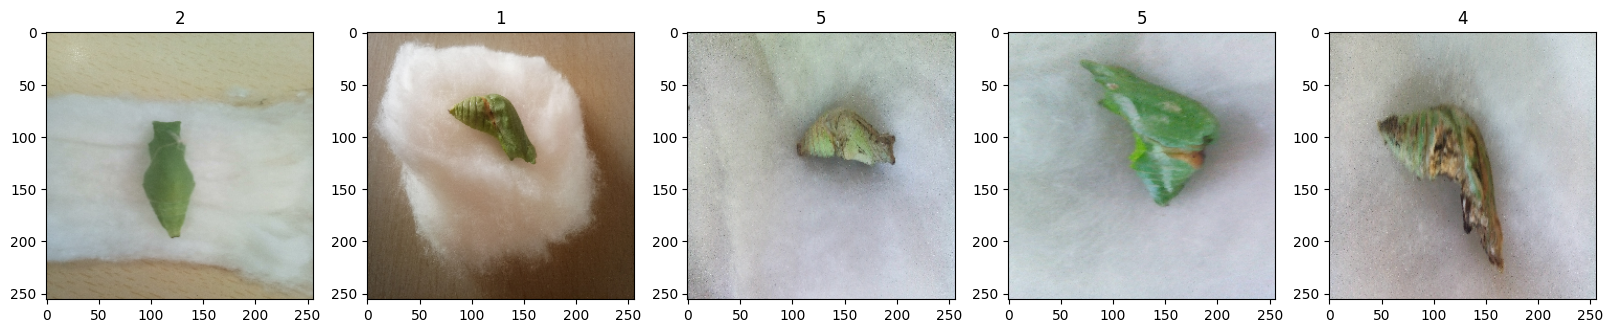

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.79682523, 0.7889821 , 0.79290366],
          [0.78639704, 0.80330884, 0.8       ],
          [0.7339652 , 0.78102404, 0.7731809 ],
          ...,
          [0.8482575 , 0.84041435, 0.8953163 ],
          [0.866165  , 0.8517042 , 0.90930223],
          [0.8672794 , 0.85159314, 0.9064951 ]],
 
         [[0.7678692 , 0.8031633 , 0.7992417 ],
          [0.7831763 , 0.8184704 , 0.81454885],
          [0.78995866, 0.8252528 , 0.8213312 ],
          ...,
          [0.8425245 , 0.85036767, 0.90134805],
          [0.84436274, 0.85343134, 0.903799  ],
          [0.8302466 , 0.83808976, 0.88907015]],
 
         [[0.74998087, 0.7931181 , 0.77743185],
          [0.760746  , 0.8071921 , 0.7915058 ],
          [0.7862324 , 0.82936966, 0.8136834 ],
          ...,
          [0.84166664, 0.8495098 , 0.9004902 ],
          [0.8371975 , 0.8450406 , 0.896021  ],
          [0.8312309 , 0.82841223, 0.88294655]],
 
         ...,
 
         [[0.82163376, 0.8294769 , 0.8883004 ],
          [0.81451

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

3

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# 7. Train

In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 72s 23s/step - loss: 0.0000e+00 - accuracy: 0.1562 - val_loss: 0.0000e+00 - val_accuracy: 0.2188
Epoch 2/20
3/3 [==============================] - 21s 6s/step - loss: 0.0000e+00 - accuracy: 0.1875 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 3/20
3/3 [==============================] - 23s 7s/step - loss: 0.0000e+00 - accuracy: 0.2083 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 4/20
3/3 [==============================] - 64s 20s/step - loss: 0.0000e+00 - accuracy: 0.2083 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 5/20
3/3 [==============================] - 18s 5s/step - loss: 0.0000e+00 - accuracy: 0.1979 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 6/20
3/3 [==============================] - 18s 5s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 7/20
3/3 [==============================] - 18s 5s/step - loss: 0.0000e+00 - accuracy: 0.1979 - val_loss: 0.0000e+00

# 8. Plot Performance

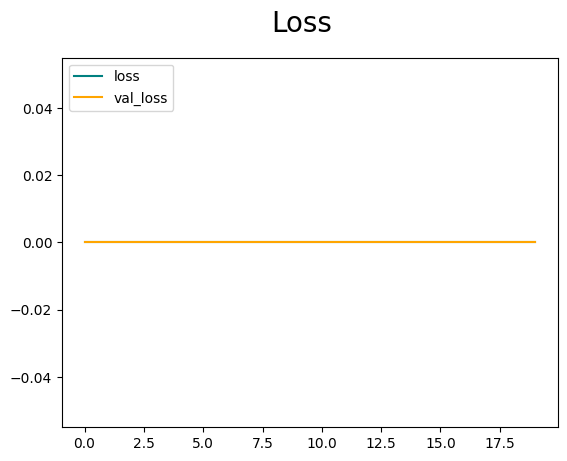

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

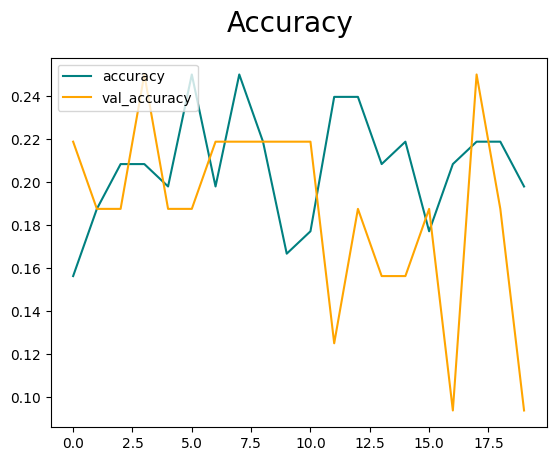

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

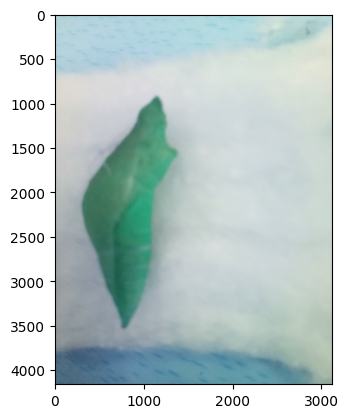

In [ ]:
img = cv2.imread('C:/jerwin/PCMS/classification/static/dataset/Pupa_defects/Healthy Pupae/demoleus.12.jpg')#https://drive.google.com/drive/u/0/folders/12ME1WUdLMAhaBijrWf8IhfuG_RfRPFMA
plt.imshow(img)
plt.show()

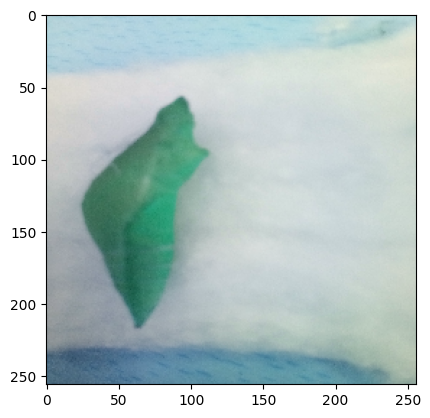

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat == 0.35:
    print(f'Predicted class is Ants bite')
elif yhat == 0.25:
    print(f'Predicted class is Deformed body')
elif yhat == 0.20:
    print(f'Predicted class is Old pupa')
elif yhat == 0.15 :
    print(f'Predicted class is Overbend')
elif yhat == 0.05 :
    print(f'Predicted class is Strecthed Abdomen')
else:
    print(f'Predicted class is Healthy')


Predicted class is Healthy


# 11. Save the Model

In [ ]:
from tensorflow.python.keras.models import load_model

In [ ]:
model.save(os.path.join('models','C:/jerwin/PCMS/classification/static/dataset/pupaClassifier.h5'))

In [ ]:
new_model = load_model('C:/jerwin/PCMS/classification/static/dataset/pupaClassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[1.]], dtype=float32)